In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

# Mnist Dataset

In [2]:
train_1 = pd.read_csv('mnist_train.csv')
test_1 = pd.read_csv('mnist_test.csv')

In [3]:
train = train_1.drop(columns='label', axis=1)
test  = test_1.drop(columns='label', axis = 1)

x_train = train.values
y_train = train_1.label.values
x_test = test.values
y_test = test_1.label.values

In [4]:
xx_train =train_1.iloc[:3000,:]
xx_train_1 = xx_train.drop(columns= 'label', axis = 1).values

xx_test = test_1.iloc[:3000, :]
xx_test_1 = xx_test.drop(columns= 'label', axis = 1).values

y_test_r = xx_test.label.values

# Dimention Reduction

#  PCA

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA().fit(x_train)
transform= pca.transform(x_train)

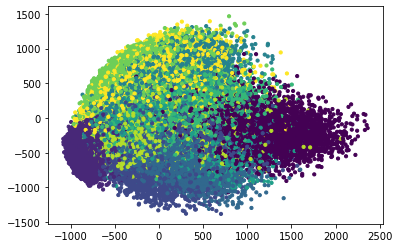

In [7]:
plt.scatter(transform[:, 0], transform[:,1] , c=train_1.label, s = 10)

# LLE

In [8]:
from sklearn.manifold import LocallyLinearEmbedding as LLE

In [11]:
lle = LLE(n_components=2).fit(xx_train_1)
transformed = lle.transform(xx_train_1)

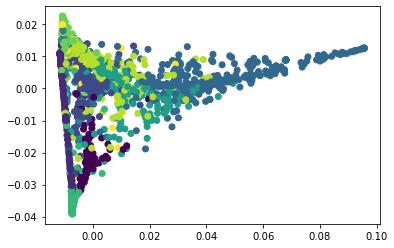

In [12]:
plt.scatter(transformed[:, 0], transformed[:,1], c =xx_train.label )

#  Test LLE

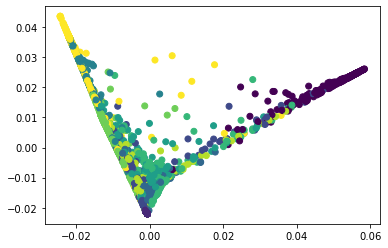

In [13]:
lle = LLE(n_components=2).fit(xx_test_1)
transform_test = lle.transform(xx_test_1)
plt.scatter(transform_test[:, 0], transform_test[:,1], c =xx_test.label )

# LDA

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [32]:
lad = LDA(n_components=2)
trans = lad.fit_transform(x_train, y_train)

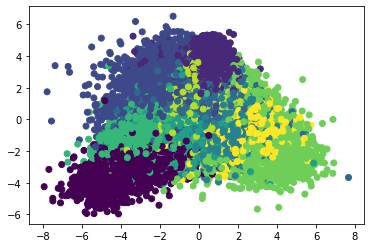

In [33]:
plt.scatter(trans[:,0], trans[:,1] , c = y_train)

# KMeans

In [14]:
from sklearn.cluster import KMeans

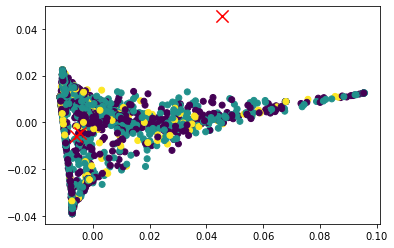

Score : 0.119
ARS :  0.17777361979219636


In [39]:
kmn = KMeans(n_clusters=3).fit(transformed)
label = kmn.predict(transform_test)
centrerio = kmn.cluster_centers_
plt.scatter(transformed[:, 0], transformed[:,1], c = label)
plt.scatter(centrerio[:,0], centrerio[:,0], marker = 'x', c = 'r', s = 150)
plt.show()

print('Score :', accuracy_score(y_test_r, label))
print('ARS : ', ARS(y_test_r, label))


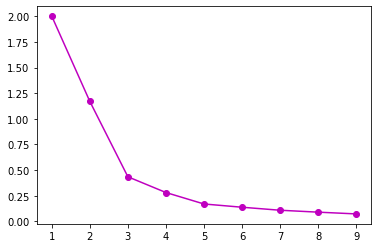

In [43]:
inertia_list =[]
cluster = np.arange(1, 10)
for k in cluster:
    kmn= KMeans(n_clusters=k)
    kmn.fit(transformed)
    inertia_list.append(kmn.inertia_)
    
plt.plot(cluster, inertia_list , 'mo-')

Text(0.5, 1.0, 'Evaluation of cluster')

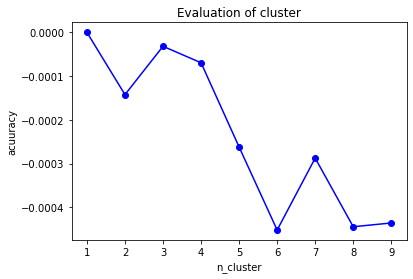

In [41]:
from sklearn.metrics import adjusted_rand_score as ARS
evalue = []
for i in range(1, 10):
    k_means= KMeans(n_clusters=i)
    k_means.fit(transformed)
    ars = ARS(y_test_r , k_means.labels_) 
    evalue.append(ars)
    
plt.plot(range(1, 10), evalue, 'bo-')
plt.xlabel('n_cluster')
plt.ylabel('acuuracy')
plt.title('Evaluation of cluster')